# ⚠️ Auto-generated Notebook
    
This notebook is automatically compiled from source files in `/workspaces/awesome-matrix/src/examples/03_cross_and_outer_products`.
**Do not edit this file directly** as your changes will be overwritten.

To make changes:
1. Edit the source file `/workspaces/awesome-matrix/src/examples/03_cross_and_outer_products/03_applications.py` instead
2. Run the compile script to regenerate this notebook

See [COMPILE.md](docs/COMPILE.md) for more information.


# Applications of Cross Products and Outer Products

In this notebook, we'll explore practical applications of cross products and outer products in various fields including:

1. **Physics and Engineering**: Computing torque, angular momentum, electromagnetic fields
2. **Computer Graphics**: Calculating surface normals and constructing rotation matrices
3. **Machine Learning**: Matrix factorization and low-rank approximations
4. **Quantum Mechanics**: Tensor products for quantum states


## Cross Product Applications

### 1. Computing Surface Normals in 3D Graphics

One of the most common applications of cross products is in computer graphics to calculate surface normals. Surface normals are vectors perpendicular to a surface, which are essential for lighting calculations and rendering.

Given a triangle with vertices $P_1$, $P_2$, and $P_3$, we can compute two vectors along the triangle's edges: $\vec{a} = P_2 - P_1$ and $\vec{b} = P_3 - P_1$. The cross product $\vec{a} \times \vec{b}$ gives us the normal vector to the triangle's surface.


Triangle vertices:
P1: tensor([0., 0., 0.])
P2: tensor([2., 0., 1.])
P3: tensor([0.0000, 3.0000, 0.5000])

Edge vectors:
edge1 (P2-P1): tensor([2., 0., 1.])
edge2 (P3-P1): tensor([0.0000, 3.0000, 0.5000])

Surface normal (not normalized):
normal = edge1 × edge2: tensor([-3., -1.,  6.])

Normalized surface normal:
normal_normalized: tensor([-0.4423, -0.1474,  0.8847])


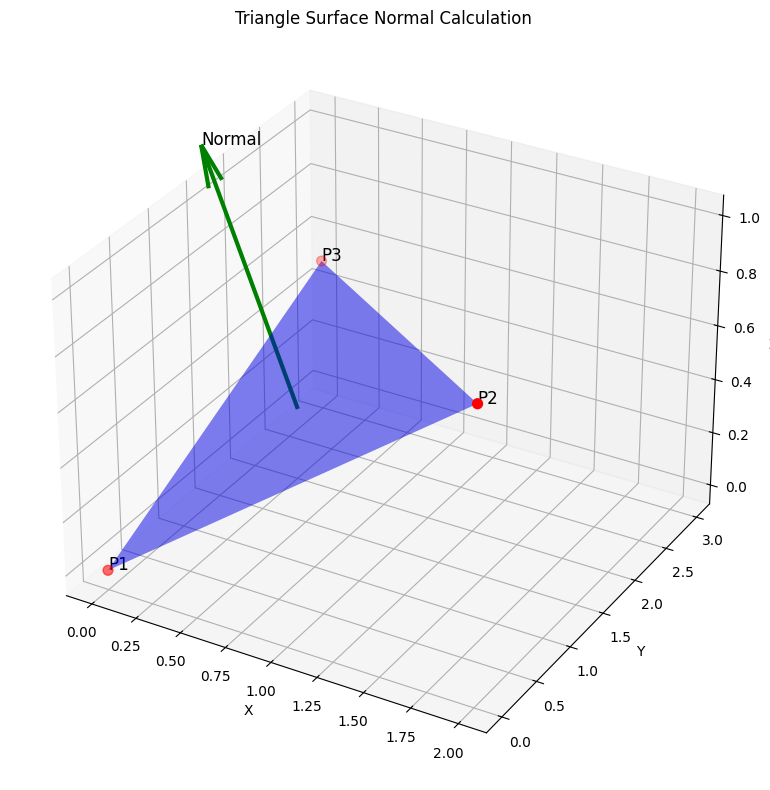

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import seaborn as sns

# Define the cross product function
def cross_product(a, b):
    return torch.tensor([
        a[1] * b[2] - a[2] * b[1],
        a[2] * b[0] - a[0] * b[2],
        a[0] * b[1] - a[1] * b[0]
    ])

# Define a triangle in 3D space
P1 = torch.tensor([0.0, 0.0, 0.0])
P2 = torch.tensor([2.0, 0.0, 1.0])
P3 = torch.tensor([0.0, 3.0, 0.5])

# Compute two edge vectors
edge1 = P2 - P1
edge2 = P3 - P1

# Compute the surface normal using cross product
normal = cross_product(edge1, edge2)

# Normalize the normal vector
normal_normalized = normal / torch.norm(normal)

print("Triangle vertices:")
print(f"P1: {P1}")
print(f"P2: {P2}")
print(f"P3: {P3}")
print("\nEdge vectors:")
print(f"edge1 (P2-P1): {edge1}")
print(f"edge2 (P3-P1): {edge2}")
print("\nSurface normal (not normalized):")
print(f"normal = edge1 × edge2: {normal}")
print("\nNormalized surface normal:")
print(f"normal_normalized: {normal_normalized}")

# Visualize the triangle and its normal
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Convert to numpy for visualization
vertices = torch.stack([P1, P2, P3]).numpy()
normal_np = normal_normalized.numpy()

# Plot the triangle
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], alpha=0.5, color='blue')

# Plot the vertices
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='red', s=50)

# Compute triangle centroid for plotting the normal
centroid = vertices.mean(axis=0)

# Scale the normal for visualization
scale = 1.0
normal_end = centroid + scale * normal_np

# Plot the normal vector
ax.quiver(centroid[0], centroid[1], centroid[2], 
          normal_np[0], normal_np[1], normal_np[2], 
          color='green', arrow_length_ratio=0.15, linewidth=3)

# Add labels and set axis limits
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Triangle Surface Normal Calculation')

# Add legend
ax.text(P1[0], P1[1], P1[2], "P1", fontsize=12)
ax.text(P2[0], P2[1], P2[2], "P2", fontsize=12)
ax.text(P3[0], P3[1], P3[2], "P3", fontsize=12)
ax.text(normal_end[0], normal_end[1], normal_end[2], "Normal", fontsize=12)

plt.tight_layout()
plt.show()


### 2. Calculating Torque in Physics

In physics, torque ($\tau$) is a measure of the force that causes an object to rotate around an axis. It's calculated as the cross product of the position vector ($\vec{r}$) from the rotation axis to the point where the force is applied, and the force vector ($\vec{F}$):

$$\vec{\tau} = \vec{r} \times \vec{F}$$

Let's implement and visualize this concept:


Position vector (r): tensor([0., 2., 0.])
Force vector (F): tensor([3., 0., 0.])
Torque (r × F): tensor([ 0.,  0., -6.])
Magnitude of torque: 6.0 N·m


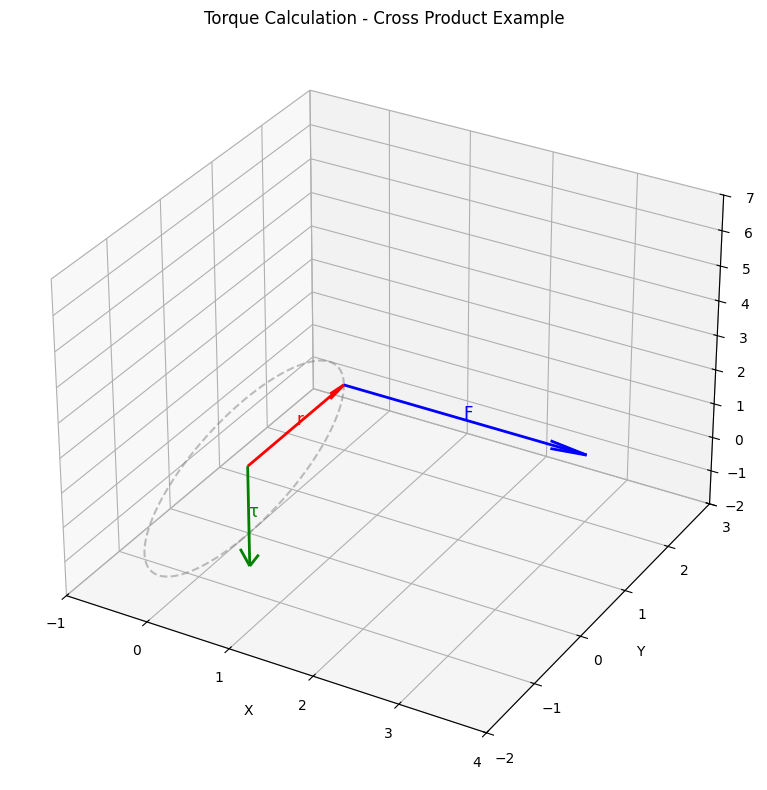

In [2]:
# Define position and force vectors
r = torch.tensor([0.0, 2.0, 0.0])  # Position vector (2 units along y-axis)
F = torch.tensor([3.0, 0.0, 0.0])  # Force vector (3 units along x-axis)

# Calculate torque
torque = cross_product(r, F)

print(f"Position vector (r): {r}")
print(f"Force vector (F): {F}")
print(f"Torque (r × F): {torque}")
print(f"Magnitude of torque: {torch.norm(torque)} N·m")

# Create a 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Origin
origin = torch.zeros(3)
o_np = origin.numpy()

# Convert to numpy for plotting
r_np = r.numpy()
F_np = F.numpy()
torque_np = torque.numpy()

# Plot position vector (from origin)
ax.quiver(o_np[0], o_np[1], o_np[2], 
          r_np[0], r_np[1], r_np[2], 
          color='red', arrow_length_ratio=0.15, linewidth=2)

# Plot force vector (from end of position vector)
ax.quiver(r_np[0], r_np[1], r_np[2], 
          F_np[0], F_np[1], F_np[2], 
          color='blue', arrow_length_ratio=0.15, linewidth=2)

# Plot torque vector (from origin)
# Scale torque for better visualization
scale = 0.5
ax.quiver(o_np[0], o_np[1], o_np[2], 
          scale*torque_np[0], scale*torque_np[1], scale*torque_np[2], 
          color='green', arrow_length_ratio=0.15, linewidth=2)

# Add a disk to represent the rotation plane
theta = np.linspace(0, 2*np.pi, 100)
x = np.zeros_like(theta)
y = r_np[1] * np.cos(theta)
z = r_np[1] * np.sin(theta)
ax.plot(x, y, z, color='gray', linestyle='--', alpha=0.5)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Torque Calculation - Cross Product Example')

# Add legend
ax.text(r_np[0]/2, r_np[1]/2, r_np[2]/2, "r", color='red', fontsize=12)
ax.text(r_np[0]+F_np[0]/2, r_np[1]+F_np[1]/2, r_np[2]+F_np[2]/2, "F", color='blue', fontsize=12)
ax.text(scale*torque_np[0]/2, scale*torque_np[1]/2, scale*torque_np[2]/2, "τ", color='green', fontsize=12)

# Set axis limits for better visualization
ax.set_xlim([-1, 4])
ax.set_ylim([-2, 3])
ax.set_zlim([-2, 7])

plt.tight_layout()
plt.show()


## Outer Product Applications

### 1. Low-Rank Matrix Approximation in Machine Learning

Outer products are the building blocks of low-rank matrix approximations, which are widely used in:
- Recommendation systems
- Image compression
- Dimensionality reduction

Singular Value Decomposition (SVD) expresses any matrix as a sum of rank-1 matrices, each of which is an outer product of vectors. The best rank-k approximation of a matrix consists of the first k terms in this sum.

Let's build a simple example of how outer products can be used for image compression:


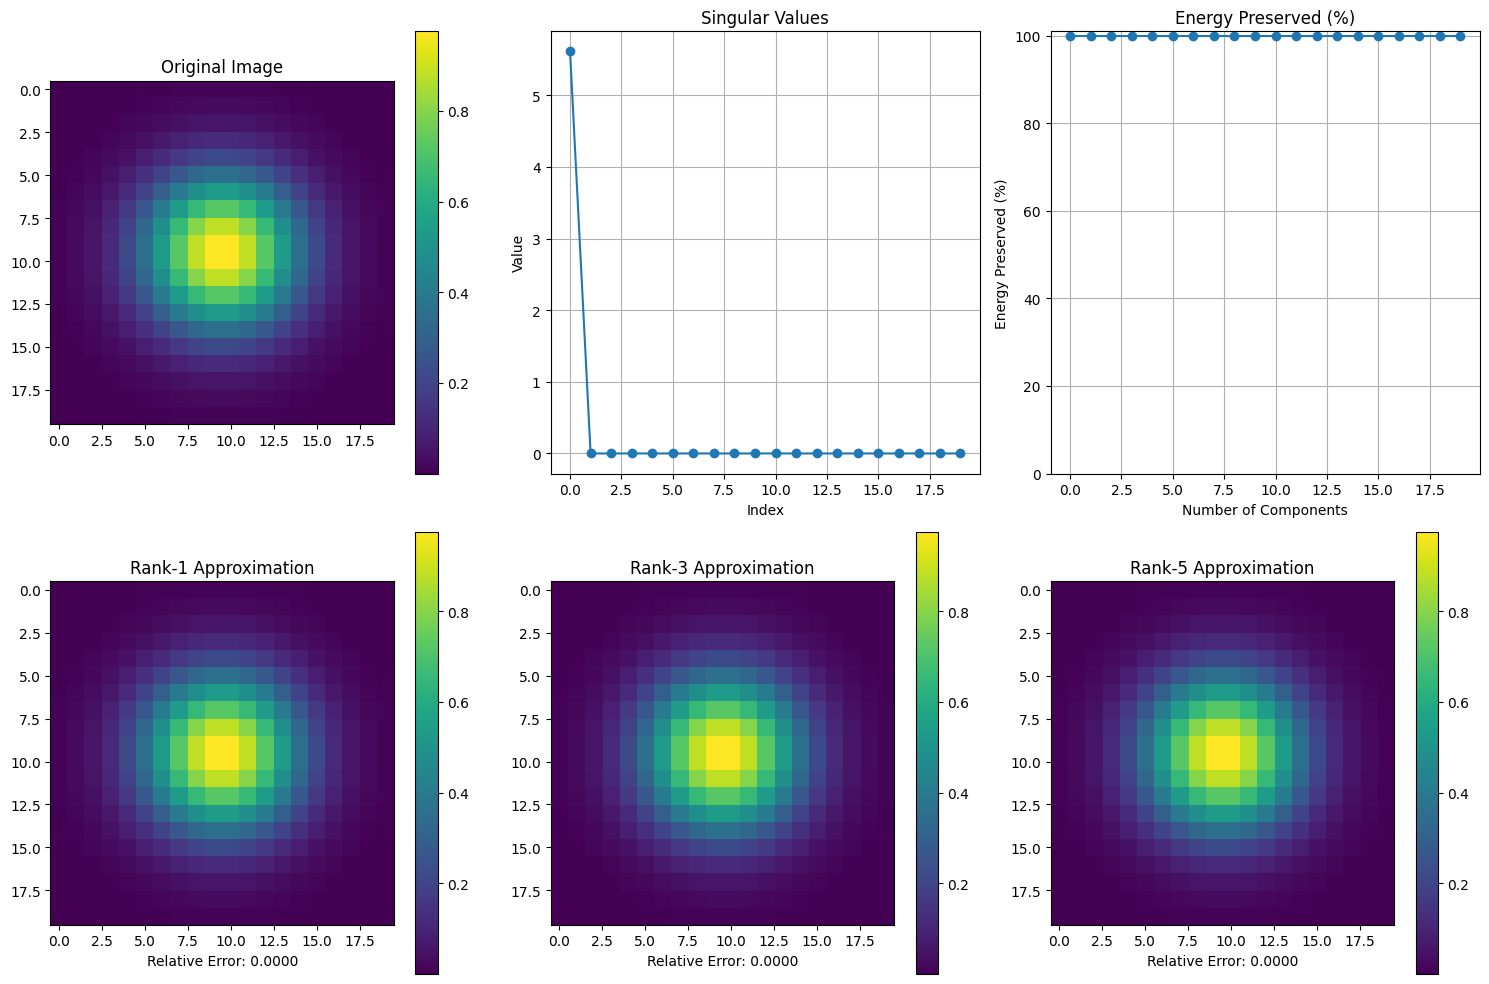

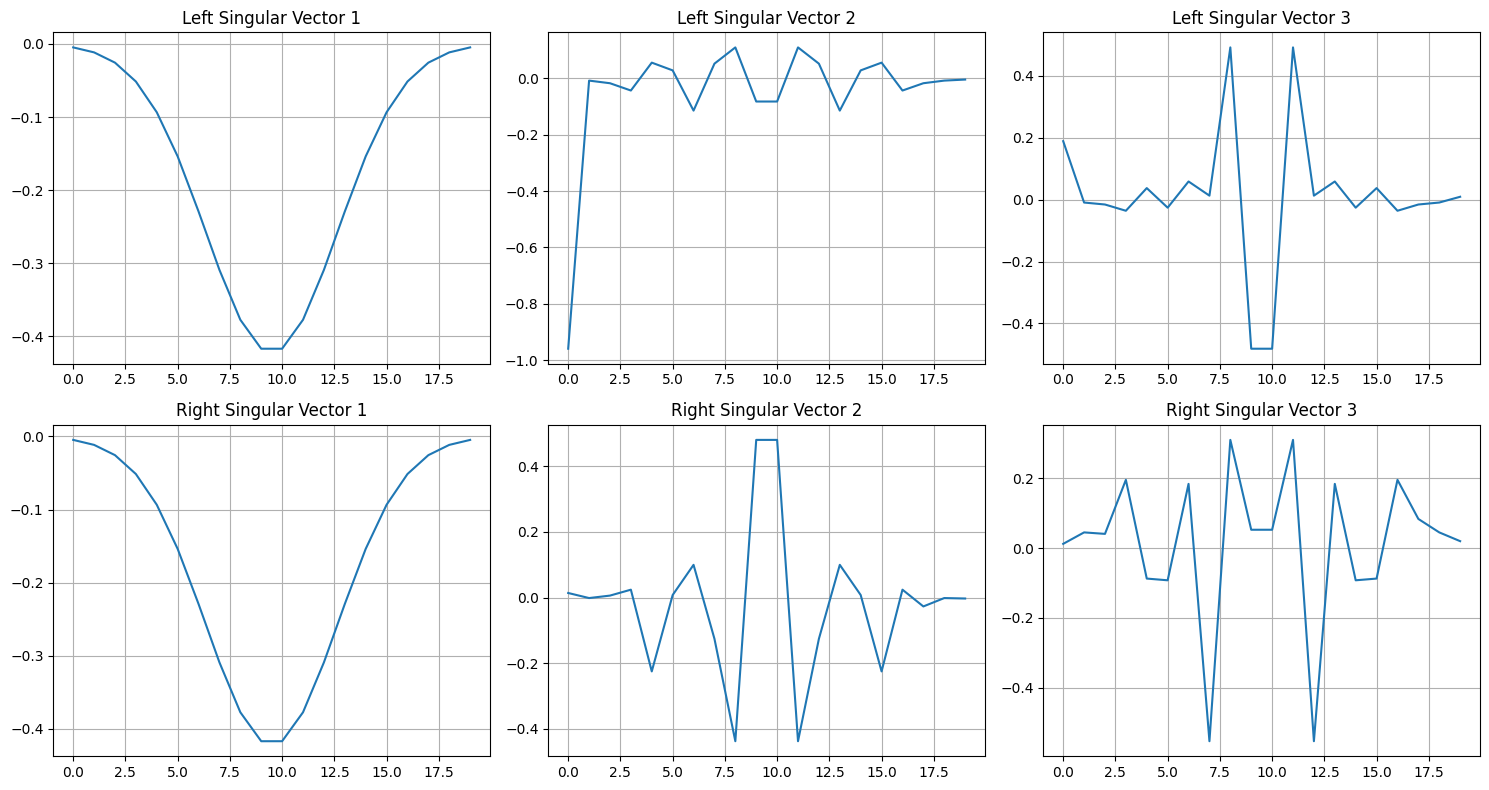

In [3]:
# Create a simple grayscale "image" (matrix)
image_size = (20, 20)
x = torch.linspace(-3, 3, image_size[0])
y = torch.linspace(-3, 3, image_size[1])
X, Y = torch.meshgrid(x, y, indexing='ij')
Z = torch.exp(-(X**2 + Y**2) / 2)  # A Gaussian blob

# Perform SVD on the image matrix
U, S, V = torch.svd(Z)

# Function to reconstruct image using k singular values
def reconstruct_image(U, S, V, k):
    """Reconstruct the image using the first k singular values."""
    reconstruction = torch.zeros_like(Z)
    for i in range(k):
        # Create a rank-1 update using outer product
        outer_product_i = torch.outer(U[:, i], V[:, i]) * S[i]
        reconstruction += outer_product_i
    return reconstruction

# Plot the original and reconstructed images for different ranks
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot original image
im = axes[0, 0].imshow(Z, cmap='viridis')
axes[0, 0].set_title('Original Image')
plt.colorbar(im, ax=axes[0, 0])

# Plot singular values
axes[0, 1].plot(S.numpy(), 'o-')
axes[0, 1].set_title('Singular Values')
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel('Value')
axes[0, 1].grid(True)

# Calculate energy preservation
energy = torch.cumsum(S**2, dim=0) / torch.sum(S**2)
axes[0, 2].plot(energy.numpy() * 100, 'o-')
axes[0, 2].set_title('Energy Preserved (%)')
axes[0, 2].set_xlabel('Number of Components')
axes[0, 2].set_ylabel('Energy Preserved (%)')
axes[0, 2].grid(True)
axes[0, 2].set_ylim([0, 101])

# Plot reconstructions for different k values
k_values = [1, 3, 5]
for i, k in enumerate(k_values):
    recon = reconstruct_image(U, S, V, k)
    im = axes[1, i].imshow(recon, cmap='viridis')
    axes[1, i].set_title(f'Rank-{k} Approximation')
    error = torch.norm(Z - recon) / torch.norm(Z)
    axes[1, i].set_xlabel(f'Relative Error: {error:.4f}')
    plt.colorbar(im, ax=axes[1, i])

plt.tight_layout()
plt.show()

# Visualize the first few components
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i in range(3):
    # Plot left singular vector (column of U)
    axes[0, i].plot(U[:, i].numpy())
    axes[0, i].set_title(f'Left Singular Vector {i+1}')
    axes[0, i].grid(True)
    
    # Plot right singular vector (column of V)
    axes[1, i].plot(V[:, i].numpy())
    axes[1, i].set_title(f'Right Singular Vector {i+1}')
    axes[1, i].grid(True)

plt.tight_layout()
plt.show()


### 2. Constructing Projection Matrices

Outer products can be used to create projection matrices. For a unit vector $\hat{u}$, the matrix $P = \hat{u} \otimes \hat{u} = \hat{u}\hat{u}^T$ projects any vector onto the direction of $\hat{u}$.

Let's demonstrate this with a simple example:


Unit vector u_hat:
tensor([0.6000, 0.8000, 0.0000])

Projection matrix P = u_hat ⊗ u_hat:
tensor([[0.3600, 0.4800, 0.0000],
        [0.4800, 0.6400, 0.0000],
        [0.0000, 0.0000, 0.0000]])

Test vector 1: tensor([1., 0., 0.])
Projection onto u_hat: tensor([0.3600, 0.4800, 0.0000])
Dot product with u_hat: 0.6000000238418579
u_hat scaled by dot product: tensor([0.3600, 0.4800, 0.0000])

Test vector 2: tensor([0., 1., 0.])
Projection onto u_hat: tensor([0.4800, 0.6400, 0.0000])
Dot product with u_hat: 0.800000011920929
u_hat scaled by dot product: tensor([0.4800, 0.6400, 0.0000])

Test vector 3: tensor([0., 0., 1.])
Projection onto u_hat: tensor([0., 0., 0.])
Dot product with u_hat: 0.0
u_hat scaled by dot product: tensor([0., 0., 0.])

Test vector 4: tensor([2., 2., 2.])
Projection onto u_hat: tensor([1.6800, 2.2400, 0.0000])
Dot product with u_hat: 2.8000001907348633
u_hat scaled by dot product: tensor([1.6800, 2.2400, 0.0000])


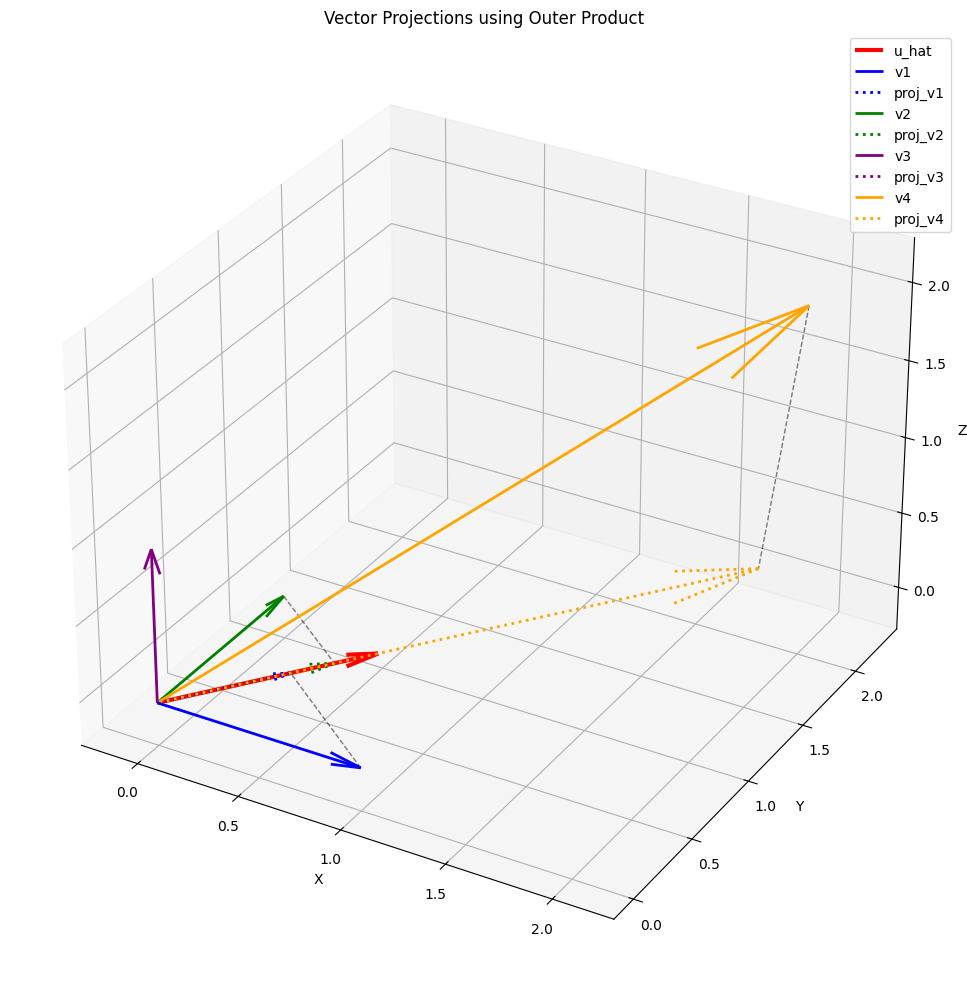

In [4]:
def outer_product(a, b):
    return torch.outer(a, b)

# Create a unit vector
u = torch.tensor([3.0, 4.0, 0.0])
u_hat = u / torch.norm(u)  # Normalize to unit vector

# Create projection matrix using outer product
P = outer_product(u_hat, u_hat)

print("Unit vector u_hat:")
print(u_hat)
print("\nProjection matrix P = u_hat ⊗ u_hat:")
print(P)

# Test the projection on various vectors
test_vectors = [
    torch.tensor([1.0, 0.0, 0.0]),  # x-axis
    torch.tensor([0.0, 1.0, 0.0]),  # y-axis
    torch.tensor([0.0, 0.0, 1.0]),  # z-axis
    torch.tensor([2.0, 2.0, 2.0])   # arbitrary vector
]

# Create a 3D visualization
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the direction vector u (scaled for visibility)
ax.quiver(0, 0, 0, u_hat[0], u_hat[1], u_hat[2], color='red', arrow_length_ratio=0.15, linewidth=3, label='u_hat')

# Plot test vectors and their projections
colors = ['blue', 'green', 'purple', 'orange']
for i, v in enumerate(test_vectors):
    # Project v onto u
    proj_v = P @ v
    
    # Print results
    print(f"\nTest vector {i+1}: {v}")
    print(f"Projection onto u_hat: {proj_v}")
    print(f"Dot product with u_hat: {torch.dot(v, u_hat)}")
    print(f"u_hat scaled by dot product: {torch.dot(v, u_hat) * u_hat}")
    
    # Plot original vector
    ax.quiver(0, 0, 0, v[0], v[1], v[2], color=colors[i], arrow_length_ratio=0.15, 
              linewidth=2, label=f'v{i+1}')
    
    # Plot projection
    ax.quiver(0, 0, 0, proj_v[0], proj_v[1], proj_v[2], color=colors[i], arrow_length_ratio=0.15, 
              linewidth=2, linestyle=':', label=f'proj_v{i+1}')
    
    # Draw a line connecting the vector tip to its projection
    if not torch.allclose(v, proj_v):
        ax.plot([v[0], proj_v[0]], [v[1], proj_v[1]], [v[2], proj_v[2]], 
                'k--', linewidth=1, alpha=0.5)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Vector Projections using Outer Product')

# Add legend
ax.legend()

# Set equal aspect ratio
max_range = np.array([
    ax.get_xlim()[1] - ax.get_xlim()[0],
    ax.get_ylim()[1] - ax.get_ylim()[0],
    ax.get_zlim()[1] - ax.get_zlim()[0]
]).max() / 2.0
mid_x = (ax.get_xlim()[1] + ax.get_xlim()[0]) / 2
mid_y = (ax.get_ylim()[1] + ax.get_ylim()[0]) / 2
mid_z = (ax.get_zlim()[1] + ax.get_zlim()[0]) / 2
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.tight_layout()
plt.show()


## The Kronecker Product - A Generalization of the Outer Product

The **Kronecker product** is a generalization of the outer product to matrices. Given matrices $A \in \mathbb{R}^{m \times n}$ and $B \in \mathbb{R}^{p \times q}$, their Kronecker product $A \otimes B$ is a matrix of size $(mp) \times (nq)$.

The Kronecker product is structured as:

$$A \otimes B = 
\begin{bmatrix} 
a_{11}B & a_{12}B & \cdots & a_{1n}B \\
a_{21}B & a_{22}B & \cdots & a_{2n}B \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1}B & a_{m2}B & \cdots & a_{mn}B
\end{bmatrix}$$

This operation is used in various applications including signal processing, quantum computing, and system modeling.


Matrix A:
tensor([[1, 2],
        [3, 4]])

Matrix B:
tensor([[5, 6],
        [7, 8]])

Kronecker product A ⊗ B:
tensor([[ 5.,  6., 10., 12.],
        [ 7.,  8., 14., 16.],
        [15., 18., 20., 24.],
        [21., 24., 28., 32.]])

Using torch.kron:
tensor([[ 5,  6, 10, 12],
        [ 7,  8, 14, 16],
        [15, 18, 20, 24],
        [21, 24, 28, 32]])
Results match: True


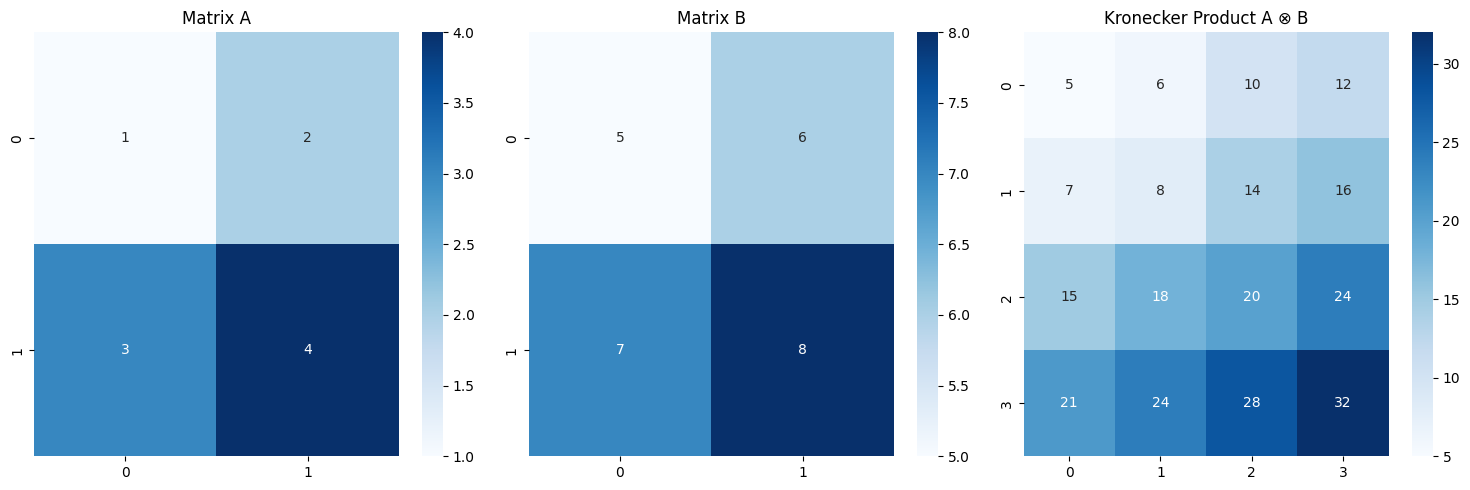

In [5]:
def kronecker_product(A, B):
    """
    Compute the Kronecker product of two matrices.
    
    Args:
        A (torch.Tensor): First matrix of shape (m, n)
        B (torch.Tensor): Second matrix of shape (p, q)
        
    Returns:
        torch.Tensor: Kronecker product of shape (m*p, n*q)
    """
    m, n = A.shape
    p, q = B.shape
    
    # Initialize result matrix
    result = torch.zeros((m * p, n * q))
    
    # Fill the result matrix
    for i in range(m):
        for j in range(n):
            result[i*p:(i+1)*p, j*q:(j+1)*q] = A[i, j] * B
            
    return result

# Example matrices
A = torch.tensor([[1, 2],
                  [3, 4]])

B = torch.tensor([[5, 6],
                  [7, 8]])

# Calculate Kronecker product
K = kronecker_product(A, B)

print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)
print("\nKronecker product A ⊗ B:")
print(K)

# Using PyTorch's built-in function for comparison
K_torch = torch.kron(A, B)
print("\nUsing torch.kron:")
print(K_torch)
print(f"Results match: {torch.allclose(K, K_torch.to(torch.float))}")

# Visualize the Kronecker product structure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot matrix A
sns.heatmap(A.numpy(), annot=True, fmt=".0f", cmap="Blues", ax=axes[0])
axes[0].set_title("Matrix A")

# Plot matrix B
sns.heatmap(B.numpy(), annot=True, fmt=".0f", cmap="Blues", ax=axes[1])
axes[1].set_title("Matrix B")

# Plot Kronecker product
sns.heatmap(K.numpy(), annot=True, fmt=".0f", cmap="Blues", ax=axes[2])
axes[2].set_title("Kronecker Product A ⊗ B")

plt.tight_layout()
plt.show()


### Application in Quantum Computing: Tensor Products of Quantum States

In quantum computing, the state of a multi-qubit system is represented using tensor products (equivalent to Kronecker products) of the individual qubit states.

For example, if we have two qubits with states $|ψ_1⟩$ and $|ψ_2⟩$, then the state of the combined system is $|ψ_1⟩ \otimes |ψ_2⟩$.

Let's implement a simple example:


Basic qubit states:
|0⟩ = tensor([1., 0.])
|1⟩ = tensor([0., 1.])
|+⟩ = tensor([0.7071, 0.7071])
|-⟩ = tensor([ 0.7071, -0.7071])

Multi-qubit states:
|00⟩ = |0⟩ ⊗ |0⟩ = tensor([1., 0., 0., 0.])
|01⟩ = |0⟩ ⊗ |1⟩ = tensor([0., 1., 0., 0.])
|+0⟩ = |+⟩ ⊗ |0⟩ = tensor([0.7071, 0.0000, 0.7071, 0.0000])
Bell state = (|00⟩ + |11⟩)/√2 = tensor([0.7071, 0.0000, 0.0000, 0.7071])


/tmp/ipykernel_13011/3265945128.py:44: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax.bar(labels, np.abs(state)**2)
/tmp/ipykernel_13011/3265945128.py:53: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax.text(i, np.abs(val)**2 + 0.05, f"∠{phase:.2f}", ha='center')


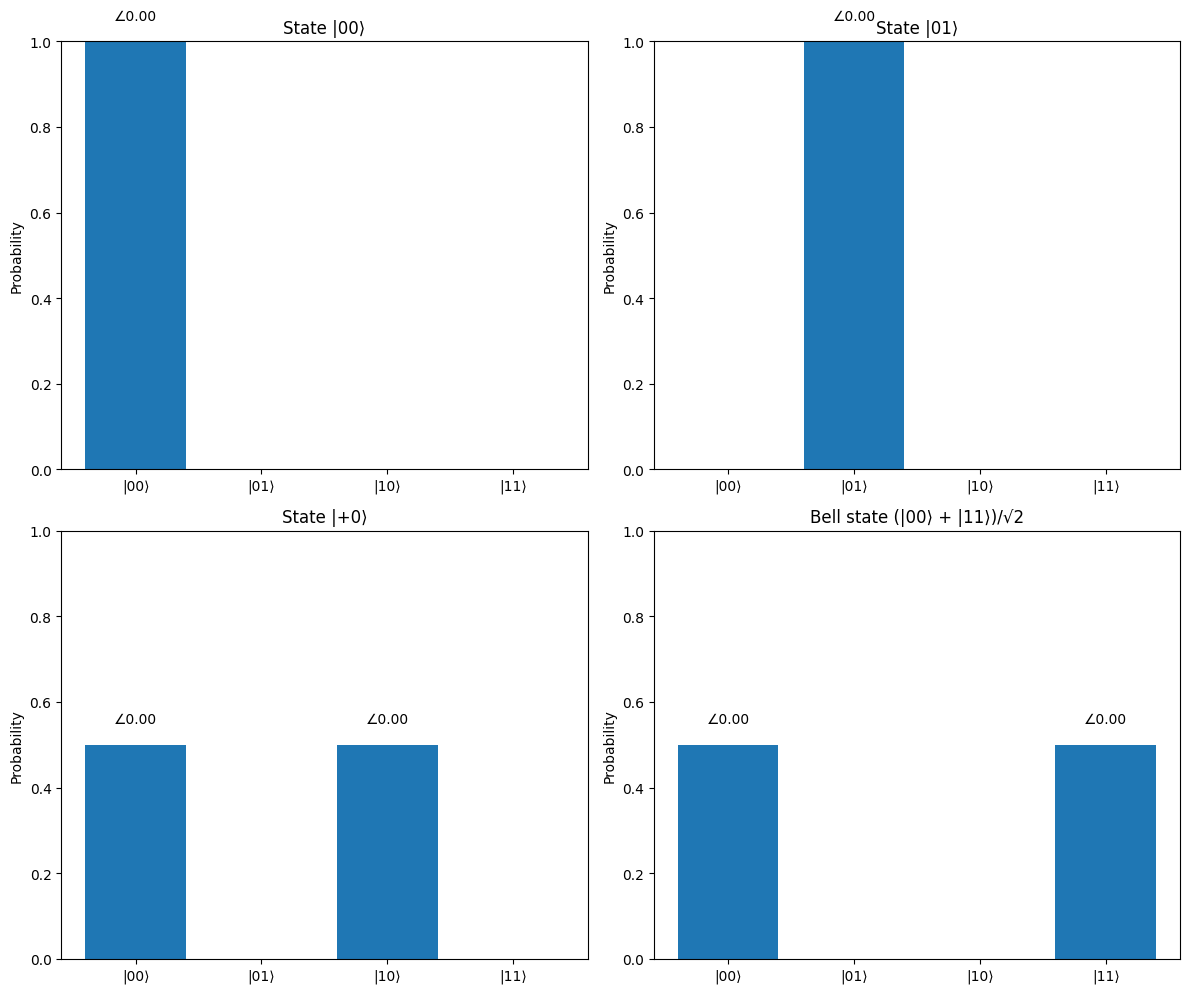

In [6]:
# Define basic qubit states
# |0⟩ and |1⟩ are the standard basis states
ket_0 = torch.tensor([1.0, 0.0])  # |0⟩
ket_1 = torch.tensor([0.0, 1.0])  # |1⟩

# Create some superposition states
# |+⟩ = (|0⟩ + |1⟩)/√2
ket_plus = torch.tensor([1.0, 1.0]) / np.sqrt(2)

# |-⟩ = (|0⟩ - |1⟩)/√2
ket_minus = torch.tensor([1.0, -1.0]) / np.sqrt(2)

print("Basic qubit states:")
print(f"|0⟩ = {ket_0}")
print(f"|1⟩ = {ket_1}")
print(f"|+⟩ = {ket_plus}")
print(f"|-⟩ = {ket_minus}")

# Create tensor products of states to represent multi-qubit systems
# |00⟩ = |0⟩ ⊗ |0⟩
state_00 = torch.kron(ket_0, ket_0)

# |01⟩ = |0⟩ ⊗ |1⟩
state_01 = torch.kron(ket_0, ket_1)

# |+0⟩ = |+⟩ ⊗ |0⟩
state_plus0 = torch.kron(ket_plus, ket_0)

# Bell state (entangled state): (|00⟩ + |11⟩)/√2
bell_state = (torch.kron(ket_0, ket_0) + torch.kron(ket_1, ket_1)) / np.sqrt(2)

print("\nMulti-qubit states:")
print(f"|00⟩ = |0⟩ ⊗ |0⟩ = {state_00}")
print(f"|01⟩ = |0⟩ ⊗ |1⟩ = {state_01}")
print(f"|+0⟩ = |+⟩ ⊗ |0⟩ = {state_plus0}")
print(f"Bell state = (|00⟩ + |11⟩)/√2 = {bell_state}")

# Visualize some of these states
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Function to plot a quantum state vector
def plot_state_vector(state, ax, title):
    labels = [f"|{bin(i)[2:].zfill(int(np.log2(len(state))))}" + "⟩" for i in range(len(state))]
    ax.bar(labels, np.abs(state)**2)
    ax.set_ylim([0, 1])
    ax.set_ylabel("Probability")
    ax.set_title(title)
    
    # Add phase information as text
    for i, val in enumerate(state):
        if torch.abs(val) > 1e-10:
            phase = np.angle(val.numpy())
            ax.text(i, np.abs(val)**2 + 0.05, f"∠{phase:.2f}", ha='center')

# Plot the states
plot_state_vector(state_00, axes[0, 0], "State |00⟩")
plot_state_vector(state_01, axes[0, 1], "State |01⟩")
plot_state_vector(state_plus0, axes[1, 0], "State |+0⟩")
plot_state_vector(bell_state, axes[1, 1], "Bell state (|00⟩ + |11⟩)/√2")

plt.tight_layout()
plt.show()


## Conclusion

In this notebook, we've explored various applications of cross products and outer products:

1. **Cross Product Applications**:
   - Computing surface normals in 3D graphics
   - Calculating torque in physics

2. **Outer Product Applications**:
   - Low-rank matrix approximation for data compression
   - Constructing projection matrices
   - Kronecker products for multi-dimensional systems
   - Quantum state representation

These operations provide powerful tools for solving problems in diverse fields. Understanding the geometric and algebraic properties of these products helps build intuition for more complex tensor operations in higher dimensions.